# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [2]:
#esto es para forzar a plt a poner fondos blancos en las figuras aunque el tema del notebook sea oscuro
#plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams['figure.facecolor'] = 'white'
cmap = plt.get_cmap("tab10")
pio.templates.default = "seaborn"

sns.set_style("darkgrid", rc={'xtick.bottom': True})

In [15]:
data_processed = "../../../data/processed/"
graph_data = data_processed + "graph_data_nohubs/"
reports = "../../../reports/reports_nohubs/"
reports_lsa = "../../../reports/reports_nohubs/analisis_lsa/"

infomap_meansim = pd.read_csv(reports_lsa+"infomap_meansim.csv")
infomap_pvalues = pd.read_csv(reports_lsa+"infomap_random_pvalues.csv")

louvain_meansim = pd.read_csv(reports_lsa+"louvain_meansim.csv")
louvain_pvalues = pd.read_csv(reports_lsa+"louvain_random_pvalues.csv")

infomap_summary = pd.read_pickle(reports+"infomap_summary.pkl")
louvain_summary = pd.read_pickle(reports+"louvain_summary.pkl")

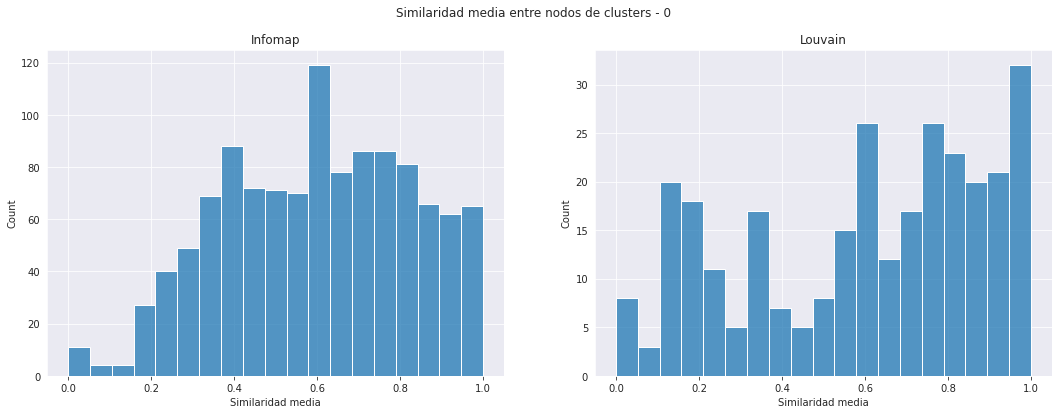

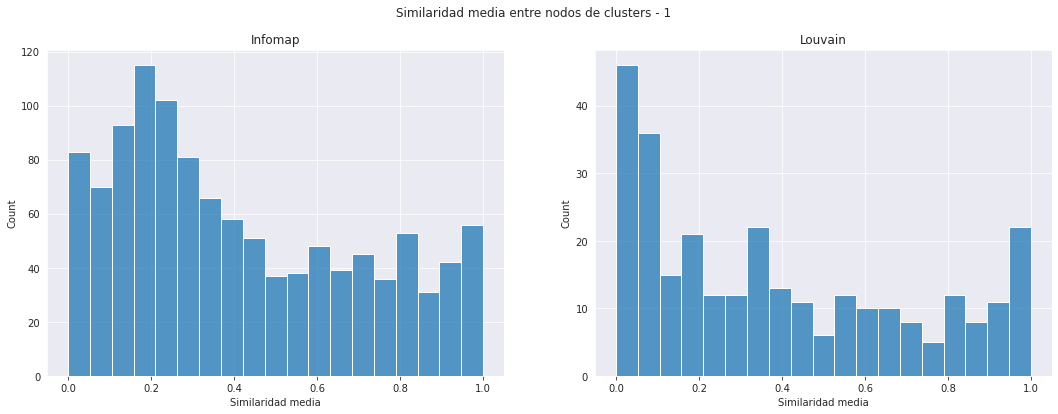

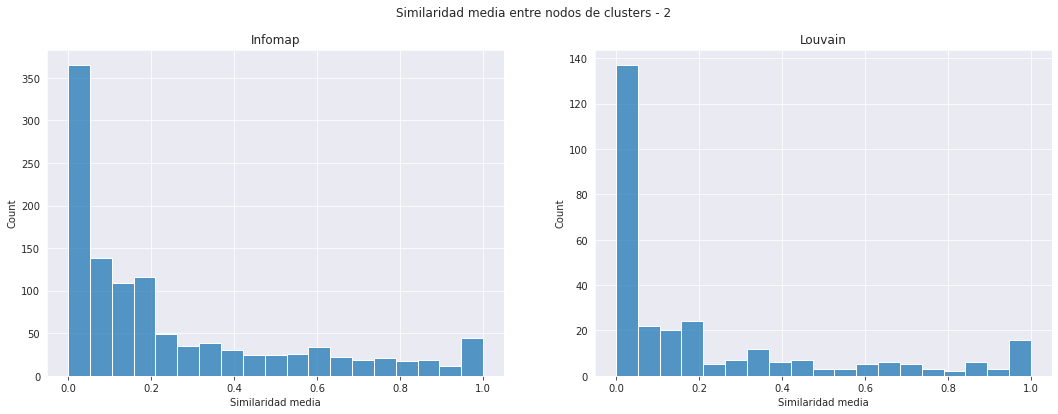

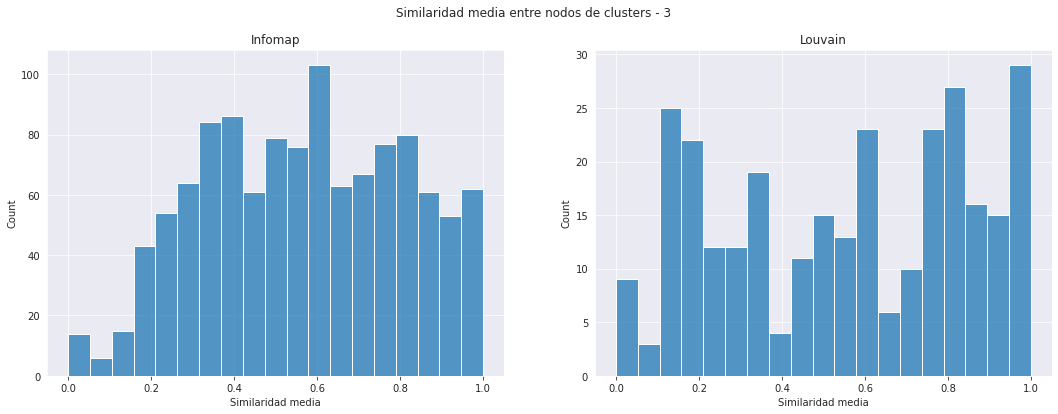

In [4]:
for i in range(4):
    fig, ax = plt.subplots(1,2,figsize=(18,6))
    fig.suptitle(f"Similaridad media entre nodos de clusters - {i}")
    # ticks = np.logspace(0,tamaños_infomap.max(),10)

    sns.histplot(data=infomap_meansim[f"mean_sim_lsa_{i}"], ax=ax[0], bins=np.linspace(0,1,20))
    ax[0].set_xlabel("Similaridad media")
    ax[0].set_title("Infomap")

    sns.histplot(data=louvain_meansim[f"mean_sim_lsa_{i}"], ax=ax[1],bins=np.linspace(0,1,20))
    ax[1].set_xlabel("Similaridad media")
    ax[1].set_title("Louvain")

# Corrección FDR

In [5]:
from statsmodels.stats import multitest

In [11]:
infomap_pvalues_reject = infomap_pvalues.set_index("comunidad").apply(lambda x: multitest.fdrcorrection(x)[0])
louvain_pvalues_reject = louvain_pvalues.set_index("comunidad").apply(lambda x: multitest.fdrcorrection(x)[0])

infomap_pvalues_adjusted = infomap_pvalues.set_index("comunidad").apply(lambda x: multitest.fdrcorrection(x)[1])
louvain_pvalues_adjusted = louvain_pvalues.set_index("comunidad").apply(lambda x: multitest.fdrcorrection(x)[1])

In [32]:
infomap_pvalues_reject.pvalue_0.value_counts()

True     1134
False      14
Name: pvalue_0, dtype: int64

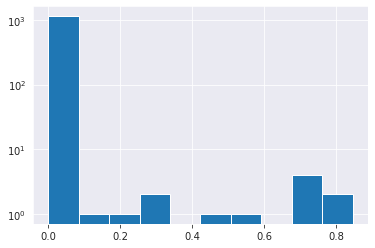

In [40]:
plot = plt.hist(infomap_pvalues_adjusted.pvalue_0, log=True)

In [33]:
louvain_pvalues_reject.pvalue_0.value_counts()

True     285
False      9
Name: pvalue_0, dtype: int64

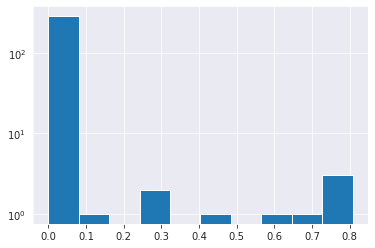

In [42]:
plot = plt.hist(louvain_pvalues_adjusted.pvalue_0,log=True)

In [43]:
infomap_rejected = infomap_summary.set_index("comunidad").loc[infomap_pvalues_reject[infomap_pvalues_reject.pvalue_0 == False].index.values].reset_index()
cols = ["comunidad","tamaño","mean_sim_lsa_0","top_monogram","top_5_monogram","top_5_monogram_score","entropia_0"]
infomap_rejected[cols]

,comunidad,tamaño,mean_sim_lsa_0,top_monogram,top_5_monogram,top_5_monogram_score,entropia_0
0,769,6,0.01,primordial,"[primordial, length, restriction, birth, growth]","[0.39, 0.3, 0.3, 0.3, 0.28]",0.33
1,196,5,0.08,exostosis,"[exostosis, epiphysis, cone, multiple, redundant]","[0.57, 0.32, 0.3, 0.23, 0.21]",0.42
2,1114,4,0.00,malformation,"[malformation, limb, eastern, descent, skeleton]","[0.31, 0.3, 0.3, 0.27, 0.27]",0.35
3,356,4,0.00,cornea,"[cornea, keratoconus, protrusion, corneal, cone]","[0.59, 0.35, 0.3, 0.27, 0.25]",0.44
4,876,3,0.00,palpebral,"[palpebral, fissure, long, eyebrow, arch]","[0.25, 0.23, 0.23, 0.19, 0.18]",0.49
5,730,3,0.04,matter,"[matter, white, mri, leukoencephalopathy, cavi...","[0.4, 0.26, 0.25, 0.22, 0.19]",0.43
6,1038,3,0.10,glomus,"[glomus, tumor, cluster, vein, dilate]","[0.86, 0.21, 0.2, 0.18, 0.17]",0.26
7,1030,3,0.00,void,"[void, expression, facial, dysfunction, aquedu...","[0.46, 0.39, 0.29, 0.28, 0.23]",0.34
8,1104,3,0.00,histone,"[histone, deletion, 9q34, methyltransferase, l...","[0.43, 0.29, 0.29, 0.28, 0.25]",0.42
9,1118,2,0.08,removal,"[removal, dissolution, osteolysis, bone, calcium]","[0.41, 0.4, 0.38, 0.37, 0.36]",0.34


In [44]:
louvain_rejected = louvain_summary.set_index("comunidad").loc[louvain_pvalues_reject[louvain_pvalues_reject.pvalue_0 == False].index.values].reset_index()
cols = ["comunidad","tamaño","mean_sim_lsa_0","top_monogram","top_5_monogram","top_5_monogram_score","entropia_0"]
louvain_rejected[cols]

,comunidad,tamaño,mean_sim_lsa_0,top_monogram,top_5_monogram,top_5_monogram_score,entropia_0
0,260,4,0.00,limb,"[limb, malformation, eastern, skeleton, descent]","[0.32, 0.32, 0.31, 0.26, 0.26]",0.34
1,250,3,0.00,histone,"[histone, 9q34, methyltransferase, deletion, l...","[0.42, 0.29, 0.27, 0.27, 0.25]",0.42
2,99,3,0.00,palpebral,"[palpebral, long, fissure, eyebrow, eversion]","[0.26, 0.25, 0.23, 0.19, 0.18]",0.49
3,182,3,0.00,void,"[void, expression, dysfunction, facial, aquedu...","[0.45, 0.37, 0.31, 0.29, 0.22]",0.34
4,279,2,0.00,bone,"[bone, hyperostosis, ced, long, waddle]","[0.39, 0.32, 0.29, 0.24, 0.24]",0.38
5,282,2,0.03,class,"[class, expression, immunodeficiency, infectio...","[0.41, 0.36, 0.32, 0.23, 0.22]",0.42
6,283,2,0.01,atonic,"[atonic, innervate, congenita, tone, spinal]","[0.7, 0.31, 0.28, 0.24, 0.21]",0.26
7,156,2,0.03,schizencephaly,"[schizencephaly, cleft, hemisphere, cerebral, ...","[0.54, 0.29, 0.27, 0.25, 0.24]",0.41
8,264,2,0.08,bone,"[bone, removal, dissolution, osteolysis, calcium]","[0.42, 0.39, 0.39, 0.37, 0.36]",0.34
